In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0, 0.5, 'Y dataset')

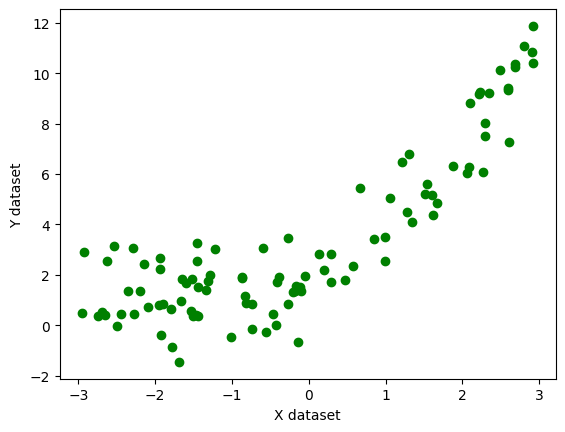

In [23]:
#making the fake dataset
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

In [25]:
from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()


In [26]:
regression1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_predict = regression1.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
score = r2_score(y_predict,y_test)

In [29]:
score

0.49397730385190675

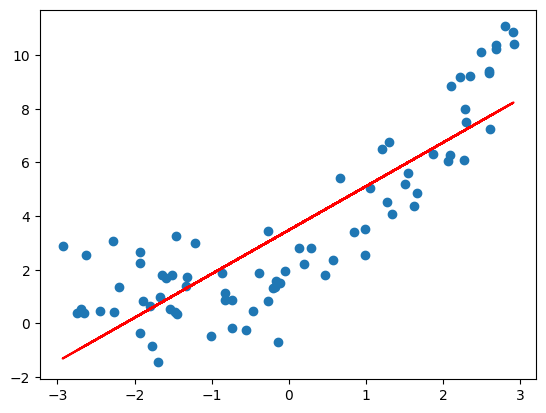

In [30]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression1.predict(X_train), color ='r')

## What is polynomial regression

Your polynomial regression is doing one simple thing:

It is fitting a curved relationship instead of a straight line.

### If your original feature was: X
### It will be now 1, X, X²


### Why It’s Still Called Linear Regression

Because it is linear in coefficients:

The powers are on X, not on coefficients.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [33]:
X_train_poly

array([[ 1.00000000e+00, -2.44565863e+00,  5.98124613e+00],
       [ 1.00000000e+00,  1.62111480e+00,  2.62801318e+00],
       [ 1.00000000e+00,  2.79816157e+00,  7.82970819e+00],
       [ 1.00000000e+00, -1.77711540e+00,  3.15813915e+00],
       [ 1.00000000e+00,  2.58903090e+00,  6.70308101e+00],
       [ 1.00000000e+00,  2.49126309e+00,  6.20639176e+00],
       [ 1.00000000e+00, -1.53872886e+00,  2.36768650e+00],
       [ 1.00000000e+00, -8.21193810e-01,  6.74359274e-01],
       [ 1.00000000e+00,  2.90056231e+00,  8.41326171e+00],
       [ 1.00000000e+00,  2.26568889e+00,  5.13334614e+00],
       [ 1.00000000e+00, -7.40717747e-01,  5.48662780e-01],
       [ 1.00000000e+00,  6.61698722e-01,  4.37845199e-01],
       [ 1.00000000e+00,  1.34657027e-01,  1.81325149e-02],
       [ 1.00000000e+00,  2.10223859e+00,  4.41940710e+00],
       [ 1.00000000e+00, -1.33670670e+00,  1.78678480e+00],
       [ 1.00000000e+00, -2.28492110e+00,  5.22086441e+00],
       [ 1.00000000e+00,  2.29107542e+00

In [34]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly) 
score = r2_score(y_test, y_pred) ## actual values first then predicted valus
score

0.8583441891511673

In [36]:

print(regression.coef_)


[[0.         1.5052839  0.51945157]]


In [37]:

print(regression.intercept_)

[1.91059421]


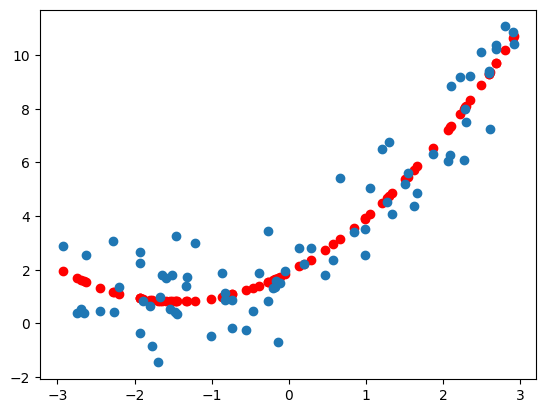

In [39]:
plt.scatter(X_train,regression.predict(X_train_poly), color='r')
plt.scatter(X_train,y_train)

In [40]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [43]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)


0.8672787372751427


In [44]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

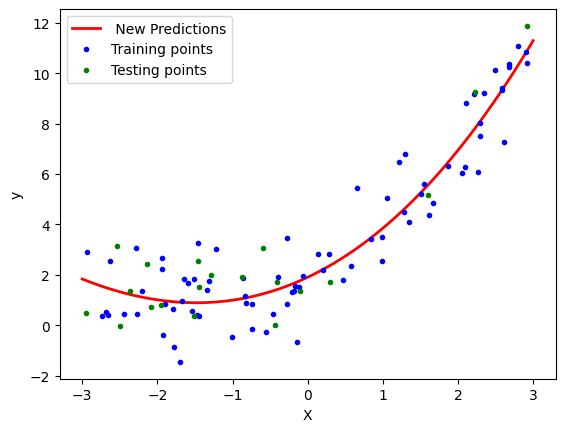

In [45]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()